In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd


file = open('timeseries_aal.csv', 'rb')
data = np.loadtxt(file, delimiter = ",")
rows, cols = np.shape(data)
x = np.arange(0, cols)
brain_region = np.arange(0,rows)


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


C:\Users\sabal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Squared-Error')

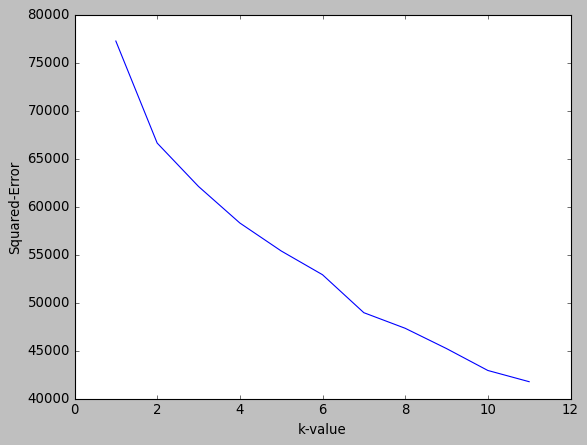

In [14]:
check_error= []
k_range = range(1,12)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data)
    check_error.append(km.inertia_)
plt.plot(k_range, check_error)
plt.xlabel('k-value')
plt.ylabel('Squared-Error')

In [6]:
model = PCA(n_components = 2)
model.fit(data)
new_data = model.transform(data)


In [11]:
kmeans = KMeans(n_clusters = 7)
y_predicted = kmeans.fit_predict(data)
y_predicted

array([1, 1, 1, 5, 3, 1, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 4, 1,
       5, 5, 3, 3, 1, 1, 1, 1, 5, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 5, 4, 4, 4, 4, 1, 1, 3, 3, 5, 5, 5, 1, 3, 5,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 6, 6, 1, 5, 1, 6,
       1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 4, 1, 1, 0])

Text(0, 0.5, 'PCA2')

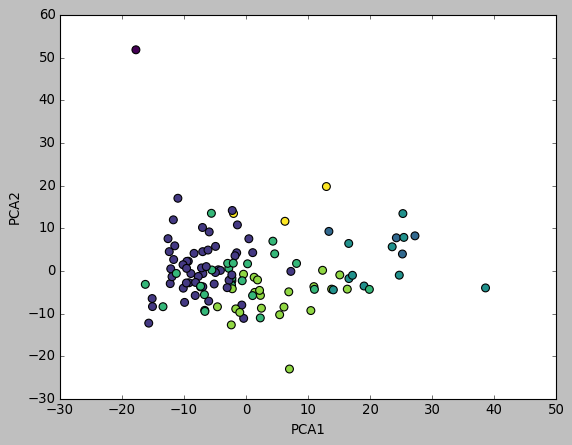

In [12]:
plt.scatter(new_data[:,0], new_data[:,1], c=y_predicted, s = 50, cmap = 'viridis')
    
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA2')

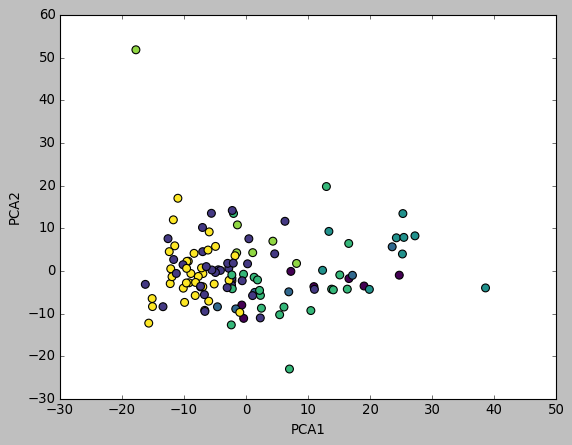

In [13]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 7).fit(data)
all_labels = gmm.predict(data)
probs = gmm.predict_proba(data)
size = 50 * probs.max(1) ** 2
plt.scatter(new_data[:, 0], new_data[:, 1], c = all_labels, cmap='viridis', s = size)
plt.xlabel('PCA1')
plt.ylabel('PCA2')